<a href="https://colab.research.google.com/github/jassi-jassi/Climate-data-Analysis/blob/main/Climate_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/monthly_data.csv')

# Display the first few rows of the dataset
print(data.head())


       STATION                 DATE REPORT_TYPE  SOURCE  AWND BackupElements  \
0  72518014735  2015-01-31T23:59:00       SOM         6   8.9         PRECIP   
1  72518014735  2015-02-28T23:59:00       SOM         6   8.7         PRECIP   
2  72518014735  2015-03-31T23:59:00       SOM         6   9.4         PRECIP   
3  72518014735  2015-04-30T23:59:00       SOM         6   9.4         PRECIP   
4  72518014735  2015-05-31T23:59:00       SOM         6   8.3         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  ...  \
0              260         PLASTIC         42.6918        -73.83109  ...   
1              260         PLASTIC         42.6918        -73.83109  ...   
2              260         PLASTIC         42.6918        -73.83109  ...   
3              260         PLASTIC         42.6918        -73.83109  ...   
4              260         PLASTIC         42.6918        -73.83109  ...   

  MonthlyMeanTemperature  MonthlyMinSeaLevelPressureValue  \
0

In [2]:
# Handle missing values
data = data.dropna(subset=['DATE', 'MonthlyMeanTemperature', 'MonthlyTotalLiquidPrecipitation'])

# Convert DATE column to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

# Set the DATE column as the index
data.set_index('DATE', inplace=True)

# Display summary statistics
print(data.describe())


            STATION  SOURCE       AWND  BackupElevation  BackupLatitude  \
count  8.700000e+01    87.0  87.000000             87.0       87.000000   
mean   7.251801e+10     6.0   7.596552            260.0       42.689729   
std    0.000000e+00     0.0   1.458930              0.0        0.004227   
min    7.251801e+10     6.0   4.700000            260.0       42.681200   
25%    7.251801e+10     6.0   6.500000            260.0       42.691800   
50%    7.251801e+10     6.0   7.400000            260.0       42.691800   
75%    7.251801e+10     6.0   8.700000            260.0       42.691800   
max    7.251801e+10     6.0  10.700000            260.0       42.691800   

       BackupLongitude         CDSD        CLDD       DSNW         HDSD  ...  \
count        87.000000    87.000000   87.000000  87.000000    87.000000  ...   
mean        -73.828239   362.954023   60.252874   1.149425  3129.402299  ...   
std           0.005819   367.436180   92.905706   1.660266  2504.767930  ...   
min 

In [3]:
# Descriptive statistics for key variables
print(data[['MonthlyMeanTemperature', 'MonthlyTotalLiquidPrecipitation']].describe())


       MonthlyMeanTemperature  MonthlyTotalLiquidPrecipitation
count               87.000000                        87.000000
mean                49.234483                         3.377586
std                 17.363701                         1.602071
min                 12.700000                         0.900000
25%                 32.900000                         2.205000
50%                 48.900000                         3.070000
75%                 66.450000                         4.095000
max                 76.500000                         8.960000


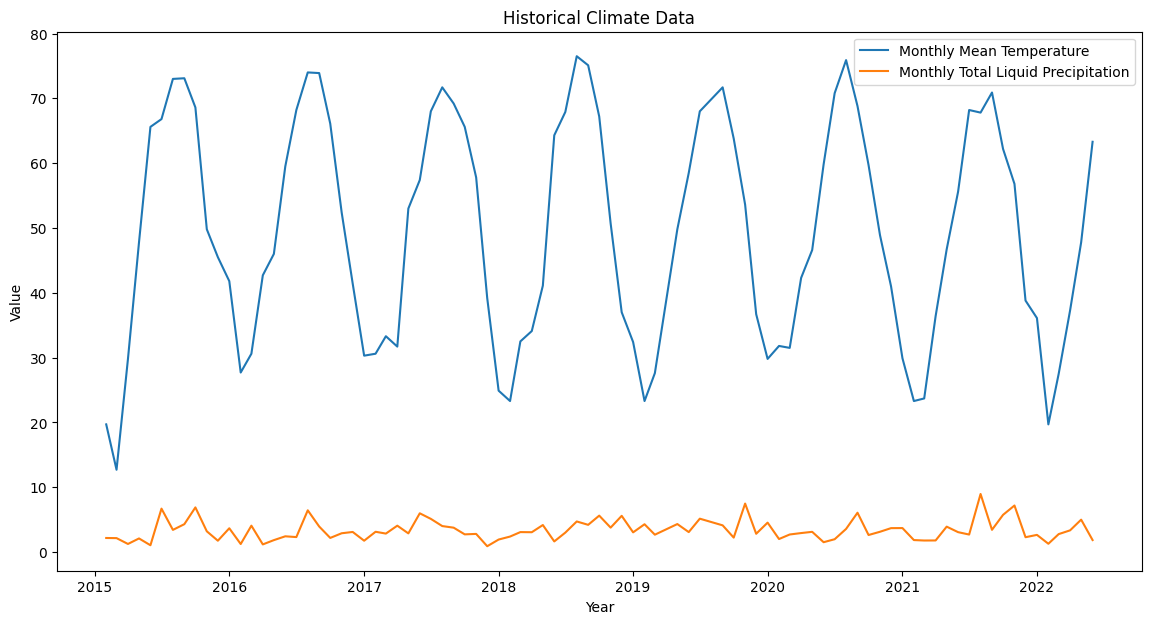

In [4]:
# Plotting the time series data
plt.figure(figsize=(14, 7))
plt.plot(data['MonthlyMeanTemperature'], label='Monthly Mean Temperature')
plt.plot(data['MonthlyTotalLiquidPrecipitation'], label='Monthly Total Liquid Precipitation')
plt.title('Historical Climate Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


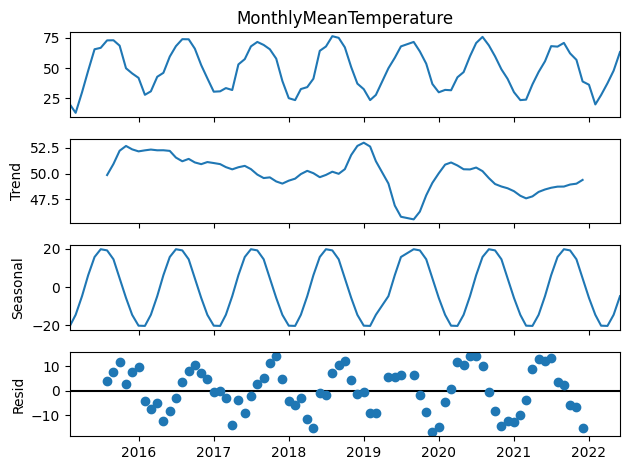

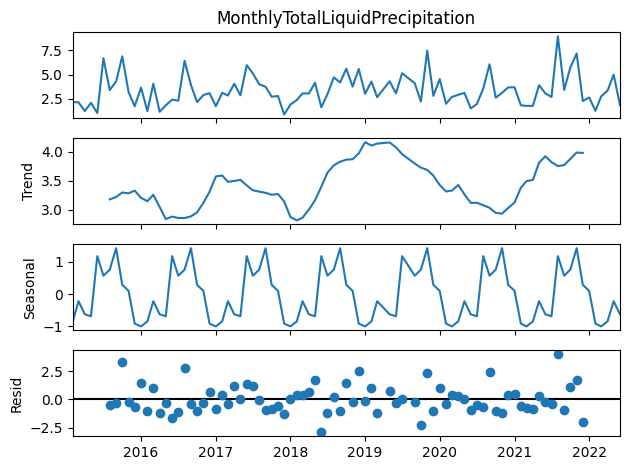

In [5]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result_temp = seasonal_decompose(data['MonthlyMeanTemperature'], model='additive', period=12)
result_temp.plot()
plt.show()

result_precip = seasonal_decompose(data['MonthlyTotalLiquidPrecipitation'], model='additive', period=12)
result_precip.plot()
plt.show()



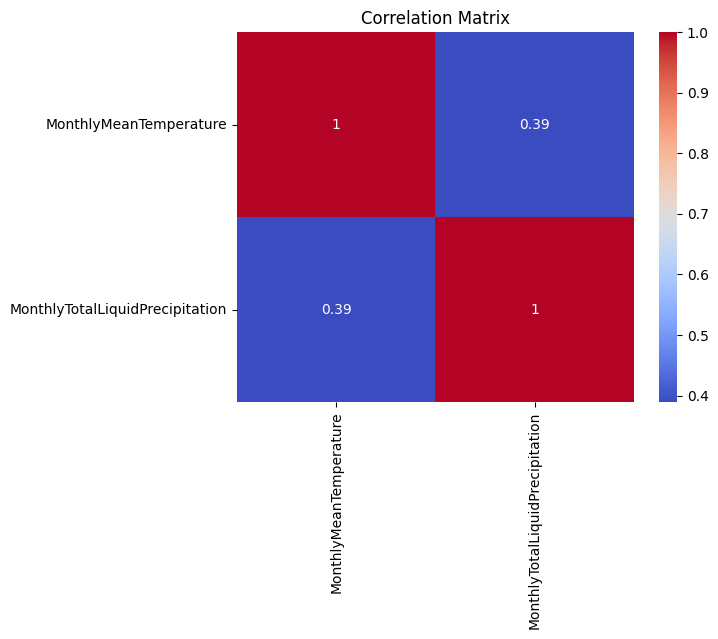

In [6]:
# Correlation Matrix
correlation_matrix = data[['MonthlyMeanTemperature', 'MonthlyTotalLiquidPrecipitation']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


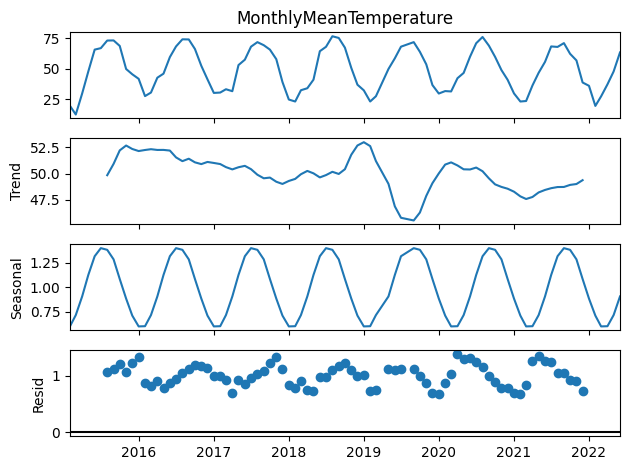

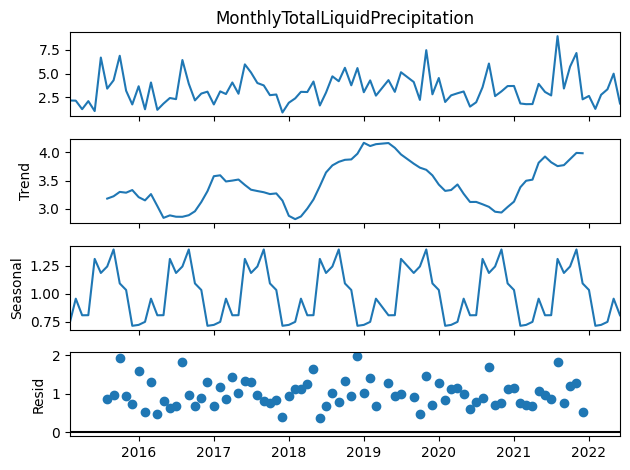

In [7]:
# Decompose temperature time series
result_temp = seasonal_decompose(data['MonthlyMeanTemperature'], model='multiplicative', period=12)
result_temp.plot()
plt.show()

# Decompose precipitation time series
result_precip = seasonal_decompose(data['MonthlyTotalLiquidPrecipitation'], model='multiplicative', period=12)
result_precip.plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                  
Dep. Variable:     MonthlyMeanTemperature   No. Observations:                   69
Model:                     ARIMA(5, 1, 0)   Log Likelihood                -223.601
Date:                    Sun, 16 Jun 2024   AIC                            459.203
Time:                            17:59:16   BIC                            472.520
Sample:                                 0   HQIC                           464.480
                                     - 69                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2024      0.115      1.755      0.079      -0.024       0.428
ar.L2          0.1962      0.116      1.687      0.092      -0.032       0.424
ar.L3          0.092

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


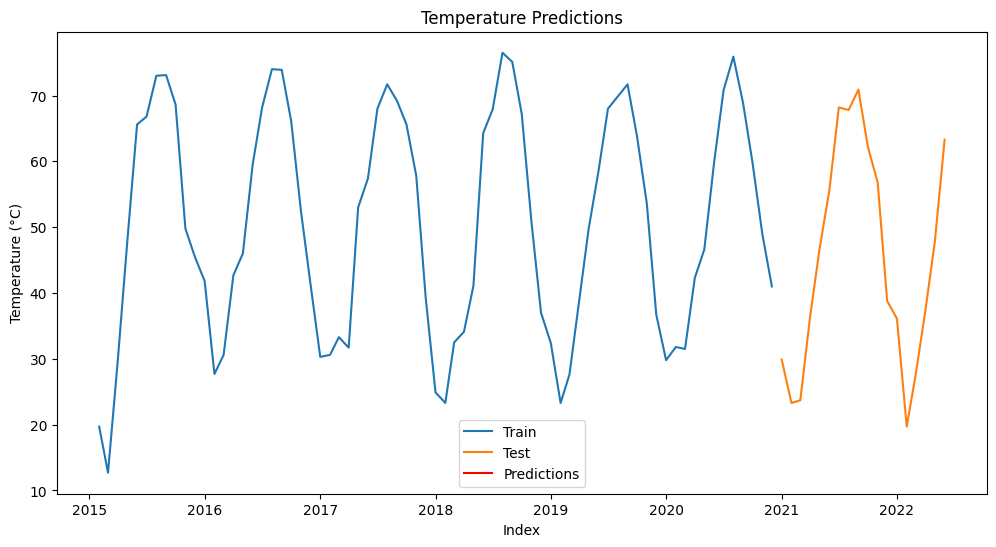

ValueError: Input contains NaN.

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Data Cleaning: Handle missing values (simple example)
data = data.dropna(subset=['MonthlyMeanTemperature', 'MonthlyTotalLiquidPrecipitation'])

# Split data into train and test sets for temperature
train_temp = data['MonthlyMeanTemperature'][:int(0.8 * len(data))]
test_temp = data['MonthlyMeanTemperature'][int(0.8 * len(data)):]

# Build and train the ARIMA model for temperature
model_temp = ARIMA(train_temp, order=(5, 1, 0))
model_fit_temp = model_temp.fit()
print(model_fit_temp.summary())

# Make predictions for temperature
predictions_temp = model_fit_temp.forecast(steps=len(test_temp))
predictions_temp = pd.Series(predictions_temp, index=test_temp.index)

# Plot the predictions against the actual values for temperature
plt.figure(figsize=(12, 6))
plt.plot(train_temp, label='Train')
plt.plot(test_temp, label='Test')
plt.plot(predictions_temp, label='Predictions', color='red')
plt.title('Temperature Predictions')
plt.xlabel('Index')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Calculate the root mean squared error for temperature
rmse_temp = np.sqrt(mean_squared_error(test_temp, predictions_temp))
print(f'Root Mean Squared Error (Temperature): {rmse_temp}')

# Split data into train and test sets for precipitation
train_precip = data['MonthlyTotalLiquidPrecipitation'][:int(0.8 * len(data))]
test_precip = data['MonthlyTotalLiquidPrecipitation'][int(0.8 * len(data)):]

# Build and train the ARIMA model for precipitation
model_precip = ARIMA(train_precip, order=(5, 1, 0))
model_fit_precip = model_precip.fit()
print(model_fit_precip.summary())

# Make predictions for precipitation
predictions_precip = model_fit_precip.forecast(steps=len(test_precip))
predictions_precip = pd.Series(predictions_precip, index=test_precip.index)

# Plot the predictions against the actual values for precipitation
plt.figure(figsize=(12, 6))
plt.plot(train_precip, label='Train')
plt.plot(test_precip, label='Test')
plt.plot(predictions_precip, label='Predictions', color='blue')
plt.title('Precipitation Predictions')
plt.xlabel('Index')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

# Calculate the root mean squared error for precipitation
rmse_precip = np.sqrt(mean_squared_error(test_precip, predictions_precip))
print(f'Root Mean Squared Error (Precipitation): {rmse_precip}')
